# Week 4 Assignment

***

## Project Description

Your assignment is to find some open public data which describes one or more populations, write up a short description of the dataset, and create a visualization from it to help explore a question of interest. You can use ANY public data you can find about ANY population you might find interesting! We are also not going to restrict the techniques you might use—feel free to use histograms, column plots, boxplots, violin plots, or more.

What is the dataset (2-3 sentences)?

This dataset is world population from WHO.

What is the question you want to answer with your visualization?

What is your approach to cleaning and visualizing the data, including your approach to making the visual easy to read and understand (a few sentences)?

What is your source code for creating the visualization (paste it)?

If you are willing to have your work shared in this manner, please write "yes, share" at the end 

## Import Libraries

In [1]:
import numpy as np
from numpy import count_nonzero, median, mean
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Plotly
import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
# import researchpy as rp

import datetime
from datetime import datetime, timedelta

%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', titlesize=9)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)

random.seed(0)
np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


## Exploratory Data Analysis

In [2]:
df = pd.read_csv("world_health_organization.csv")

In [3]:
df.head()

,Country,Continent,BMI,Population,LifeExp_female,Life_expectancy,CHE GDP(%),GDP,Status
0,Afghanistan,Asia,22.90,34413603.00,64.70,63.20,10.10,19907111418.99,Developing
1,Albania,Europe,26.70,2880703.00,78.20,76.10,NaN,11386927679.09,Developing
2,Algeria,Africa,25.50,39728025.00,77.20,76.20,7.00,165978425168.39,Developing
3,Andorra,Europe,27.00,78011.00,NaN,NaN,10.30,2811489408.89,Developing
4,Angola,Africa,22.90,27884381.00,64.50,62.20,2.60,116193649124.15,Developing


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          194 non-null    object 
 1   Continent        194 non-null    object 
 2   BMI              191 non-null    float64
 3   Population       191 non-null    float64
 4   LifeExp_female   183 non-null    float64
 5   Life_expectancy  183 non-null    float64
 6   CHE GDP(%)       187 non-null    float64
 7   GDP              188 non-null    float64
 8   Status           194 non-null    object 
dtypes: float64(6), object(3)
memory usage: 13.8+ KB


In [5]:
df.describe(include='all')

,Country,Continent,BMI,Population,LifeExp_female,Life_expectancy,CHE GDP(%),GDP,Status
count,194,194,191.00,191.00,183.00,183.00,187.00,188.00,194
unique,194,7,NaN,NaN,NaN,NaN,NaN,NaN,2
top,Afghanistan,Africa,NaN,NaN,NaN,NaN,NaN,NaN,Developing
freq,1,54,NaN,NaN,NaN,NaN,NaN,NaN,159
mean,NaN,NaN,25.80,38186078.07,73.85,71.48,6.69,390535835319.64,NaN
std,NaN,NaN,2.44,141622545.06,8.16,7.75,2.92,1632154093304.84,NaN
min,NaN,NaN,20.40,11099.00,52.00,51.40,1.90,35492333.86,NaN
25%,NaN,NaN,23.80,2018274.00,67.70,65.70,4.60,7613340690.40,NaN
50%,NaN,NaN,26.30,8454028.00,76.20,73.30,6.30,31021048102.00,NaN
75%,NaN,NaN,27.30,27028516.50,79.35,76.70,8.20,187573780619.72,NaN


In [6]:
df.columns

Index(['Country', 'Continent', 'BMI', 'Population', 'LifeExp_female', 'Life_expectancy', 'CHE GDP(%)', 'GDP', 'Status'], dtype='object')

In [7]:
df.Continent.value_counts()

Africa           54
Asia             45
Europe           42
North America    23
Oceania          16
South America    12
Europe/Asia       2
Name: Continent, dtype: int64

In [8]:
asia_cont = df[df["Continent"] == "Asia"]

In [9]:
asia_cont

,Country,Continent,BMI,Population,LifeExp_female,Life_expectancy,CHE GDP(%),GDP,Status
0,Afghanistan,Asia,22.90,34413603.00,64.70,63.20,10.10,19907111418.99,Developing
7,Armenia,Asia,26.50,2925553.00,77.90,74.60,10.10,10553337672.99,Developing
10,Azerbaijan,Asia,26.90,9649341.00,75.50,72.90,6.70,53074468085.11,Developing
12,Bahrain,Asia,25.00,1371851.00,79.40,78.80,5.00,31125877659.57,Developing
13,Bangladesh,Asia,21.60,156256276.00,74.00,72.20,2.50,195078678697.23,Developing
19,Bhutan,Asia,23.80,727876.00,70.30,70.20,3.70,2003598213.03,Developing
24,Brunei Darussalam,Asia,27.20,414907.00,77.30,76.20,2.40,12930394937.81,Developing
29,Cambodia,Asia,22.00,15521436.00,70.80,69.00,6.20,18049954289.42,Developing
35,China,Asia,23.90,1371220000.00,77.70,76.20,4.90,11015542352468.90,Developing
46,Democratic People's Republic of Korea,Asia,24.10,25183833.00,75.20,71.80,NaN,NaN,Developing


In [10]:
df3 = df[(df["Country"] == "Brunei Darussalam") | (df["Country"] == "Cambodia") | (df["Country"] == "Indonesia") | \
  (df["Country"] == "Lao People's Democratic Republic") | (df["Country"] == "Malaysia") | (df["Country"] == "Myanmar")|\
  (df["Country"] == "Philippines") | (df["Country"] == "Singapore") | (df["Country"] == "Thailand") | \
  (df["Country"] == "Viet Nam")]

In [11]:
df3.reset_index(drop=True, inplace=True)

In [12]:
df3

,Country,Continent,BMI,Population,LifeExp_female,Life_expectancy,CHE GDP(%),GDP,Status
0,Brunei Darussalam,Asia,27.20,414907.00,77.30,76.20,2.40,12930394937.81,Developing
1,Cambodia,Asia,22.00,15521436.00,70.80,69.00,6.20,18049954289.42,Developing
2,Indonesia,Asia,23.10,258383256.00,71.20,69.10,3.00,860854235065.08,Developing
3,Lao People's Democratic Republic,Asia,22.60,6741164.00,67.00,65.50,2.50,14390442307.40,Developing
4,Malaysia,Asia,25.60,30270962.00,77.50,75.10,3.90,301354756113.17,Developing
5,Myanmar,Asia,22.60,52680726.00,68.70,66.50,5.20,59687410896.57,Developing
6,Philippines,Asia,23.00,102113212.00,72.50,69.20,4.30,292774099013.69,Developing
7,Singapore,Asia,23.80,5535002.00,84.80,82.70,4.20,308004146057.61,Developing
8,Thailand,Asia,24.50,68714511.00,79.10,75.30,3.70,401295970240.34,Developing
9,Viet Nam,Asia,21.70,92677076.00,80.70,76.20,5.70,193241108709.54,Developing


In [13]:
df3.to_csv("sea.csv", index=False)

## Data Visualization

### Univariate Data Exploration

In [14]:
df3 = pd.read_csv("sea.csv")

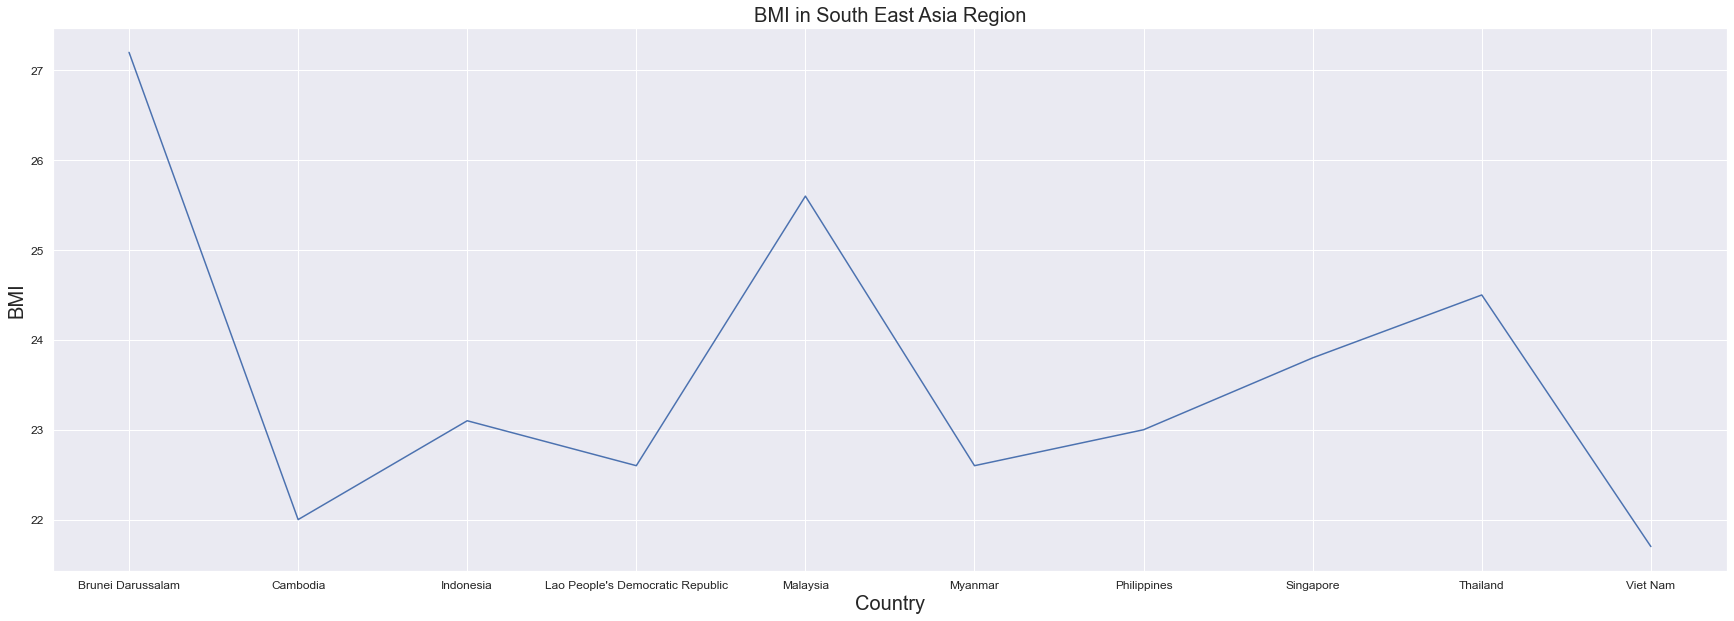

In [15]:
fig = plt.figure(figsize=(30,10))
sns.lineplot(x=df3.Country,y=df3.BMI,data=df3, estimator=None)
plt.title("BMI in South East Asia Region", fontsize=20)
plt.xlabel("Country", fontsize=20)
plt.ylabel("BMI", fontsize=20)
#plt.legend(['',''])
plt.show()

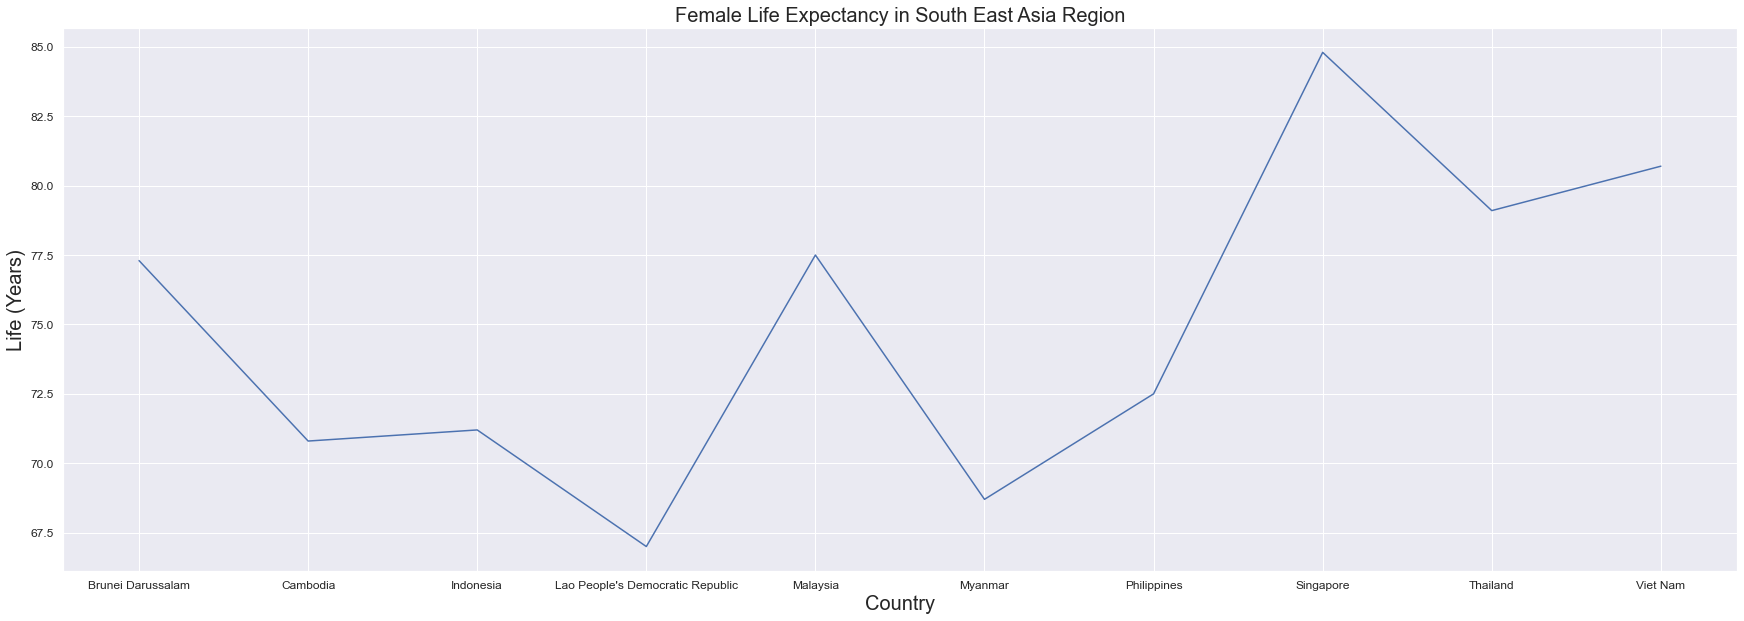

In [16]:
fig = plt.figure(figsize=(30,10))
sns.lineplot(x=df3.Country,y=df3.LifeExp_female, data=df3, estimator=None)
plt.title("Female Life Expectancy in South East Asia Region", fontsize=20)
plt.xlabel("Country", fontsize=20)
plt.ylabel("Life (Years)", fontsize=20)
#plt.legend(['',''])
plt.show()

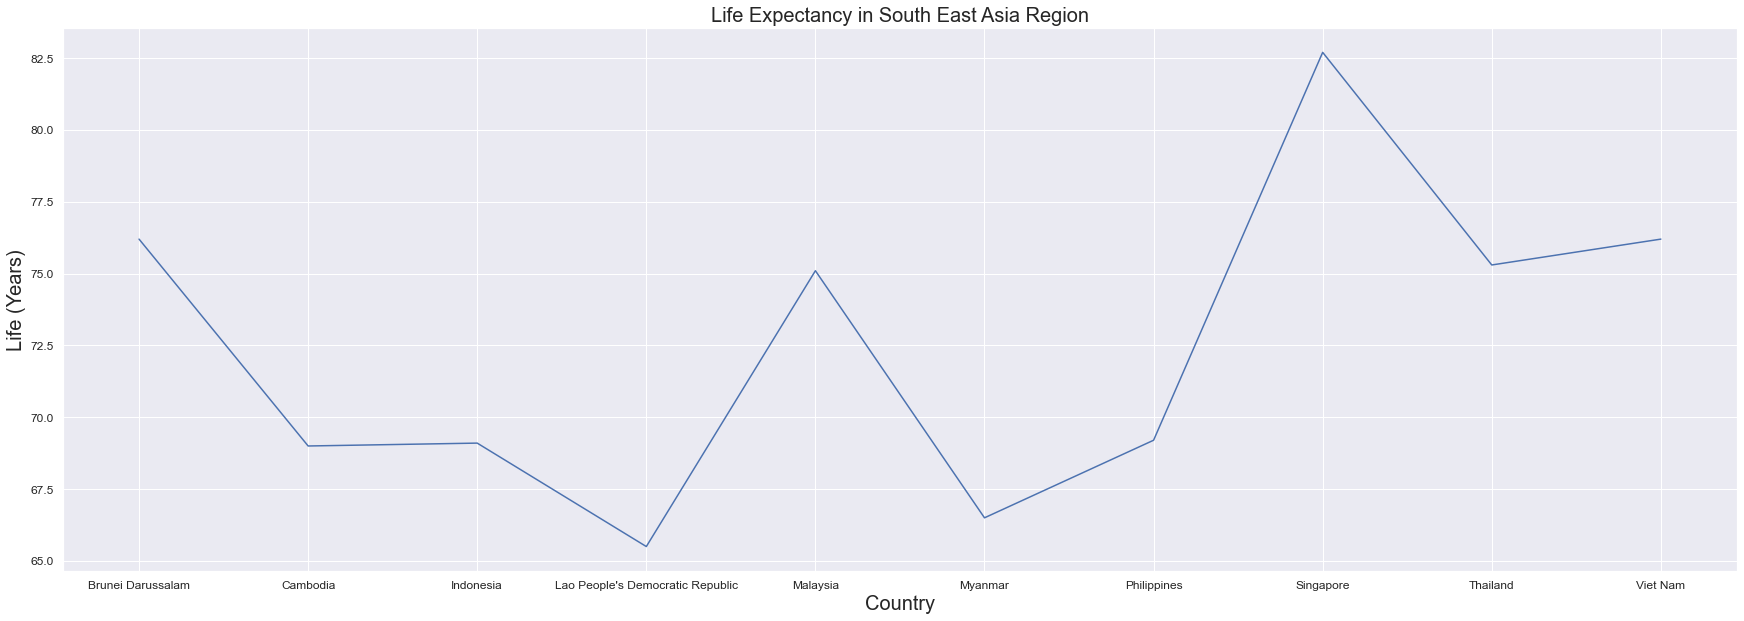

In [17]:
fig = plt.figure(figsize=(30,10))
sns.lineplot(x=df3.Country,y=df3.Life_expectancy, data=df3, estimator=None)
plt.title("Life Expectancy in South East Asia Region", fontsize=20)
plt.xlabel("Country", fontsize=20)
plt.ylabel("Life (Years)", fontsize=20)
#plt.legend(['',''])
plt.show()

## Plotly Express Graphs

In [18]:
fig = px.bar(data_frame=df, x="", y="", 
             width=600, height=400, title="",
             hover_data=['lifeExp', 'gdpPercap'], color='lifeExp',
             labels={'pop':'population of Canada'})
fig.show()

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['Country', 'Continent', 'BMI', 'Population', 'LifeExp_female', 'Life_expectancy', 'CHE GDP(%)', 'GDP', 'Status'] but received: 

In [ ]:
fig = px.pie(data_frame=df3, names="", values="", 
             width=600, height=400, title="",
             )
fig.show()

In [ ]:
fig = px.scatter(data_frame=df, x="", y="", color="continent", title="",
                 size="pop", size_max=10, hover_name="country")
fig.show()

In [ ]:
fig = px.scatter(data_frame=df, x="", y="", color="continent", size="pop", size_max=60, title="",
          hover_name="country", facet_col="continent", log_x=True)
fig.show()

In [ ]:
fig = px.scatter(data_frame=df, x="", y="", animation_frame="year", animation_group="country",title="",
           size="pop", color="continent", hover_name="country", facet_col="continent",
           log_x=True, size_max=45, range_x=[100,100000], range_y=[25,90],
           labels=dict(pop="Population", gdpPercap="GDP per Capita", lifeExp="Life Expectancy"))
fig.show()

In [ ]:
fig = px.box(data_frame=df, x="time", y="total_bill", facet_col="quartilemethod", color="quartilemethod")

fig.show()

In [ ]:
fig = px.scatter_matrix(data_frame=df, title="Heatmap", width=2000, height=2000,
                       labels={col:col.replace('_', ' ') for col in df.columns})
fig.show()

In [ ]:
fig = px.choropleth(data_frame=df, locations="iso_alpha", color="lifeExp", hover_name="country", 
                    animation_frame="year", title="",
                    color_continuous_scale=px.colors.sequential.Plasma, projection="natural earth")
fig.show()

In [ ]:
fig = px.line(data_frame=df, x="", y="", color="continent", line_group="country", hover_name="country",
              title="", line_shape="spline", render_mode="svg", 
              labels={'actual_productivity': 'Actual Productivity'})
fig.show() 

In [ ]:
fig = px.area(data_frame=df, x="", y="", color="continent", line_group="country", title="",
              labels={'actual_productivity': 'Actual Productivity'})
fig.show()

In [ ]:
fig = px.imshow(df,labels=dict(x= "Year",color= "GDP%")) #Code A
fig.layout.title = "GDP Annual Growth Rate" # Code B
fig.show()

#### Python code done by Dennis Lam